<a href="https://colab.research.google.com/github/umamkhan124/wildfire_Forestfire/blob/main/Umam_India_Widfire_Dataset_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('datafile.csv')
df.head()


,States/UTs,2010-2011,2009-10,2008-09
0,Andaman and Nicobar,0,7,1
1,Andhra Pradesh,1119,1837,2442
2,Arunachal Pradesh,485,576,786
3,Assam,1322,2511,1901
4,Bihar,81,397,143


In [ ]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   States/UTs  35 non-null     object
 1   2010-2011   35 non-null     int64 
 2   2009-10     35 non-null     int64 
 3   2008-09     35 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


,2010-2011,2009-10,2008-09
count,35.000000,35.000000,35.000000
mean,397.085714,882.628571,694.514286
std,518.778961,1145.029722,981.051758
min,0.000000,0.000000,0.000000
25%,4.000000,18.000000,11.500000
50%,86.000000,224.000000,182.000000
75%,829.500000,1698.500000,885.000000
max,1691.000000,4675.000000,3434.000000


In [ ]:
df.isnull().sum()

,0
States/UTs,0
2010-2011,0
2009-10,0
2008-09,0


In [ ]:
df.tail()


,States/UTs,2010-2011,2009-10,2008-09
30,Tamil nadu,34,148,276
31,Tripura,634,1127,717
32,Uttar Pradesh,198,737,370
33,Uttarakhand,85,855,631
34,West Bengal,197,224,100


In [ ]:
df.shape

(35, 4)

In [ ]:
df.nunique()


,0
States/UTs,35
2010-2011,28
2009-10,29
2008-09,29


In [ ]:
print(df.columns)


Index(['States/UTs', '2010-2011', '2009-10', '2008-09'], dtype='object')


In [ ]:
numeric_df = df[['2010-2011', '2009-10', '2008-09']]
print(numeric_df.corr())


           2010-2011   2009-10   2008-09
2010-2011   1.000000  0.941676  0.914658
2009-10     0.941676  1.000000  0.878894
2008-09     0.914658  0.878894  1.000000


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


In [ ]:

df.columns = df.columns.str.strip()


print("Missing values:\n", df.isnull().sum())


numeric_cols = ['2010-2011', '2009-10', '2008-09']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())


df = df.drop_duplicates()


Missing values:
 States/UTs    0
2010-2011     0
2009-10       0
2008-09       0
dtype: int64


/tmp/ipython-input-3849554044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='States/UTs', y='2010-2011', data=df, palette='viridis')


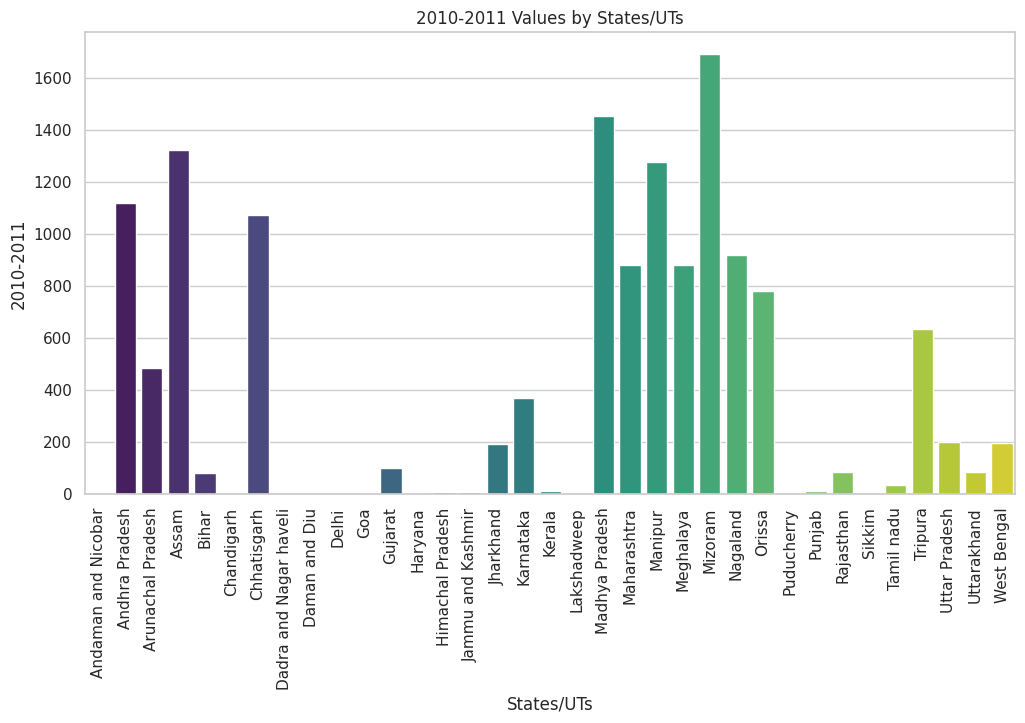

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='States/UTs', y='2010-2011', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('2010-2011 Values by States/UTs')
plt.show()


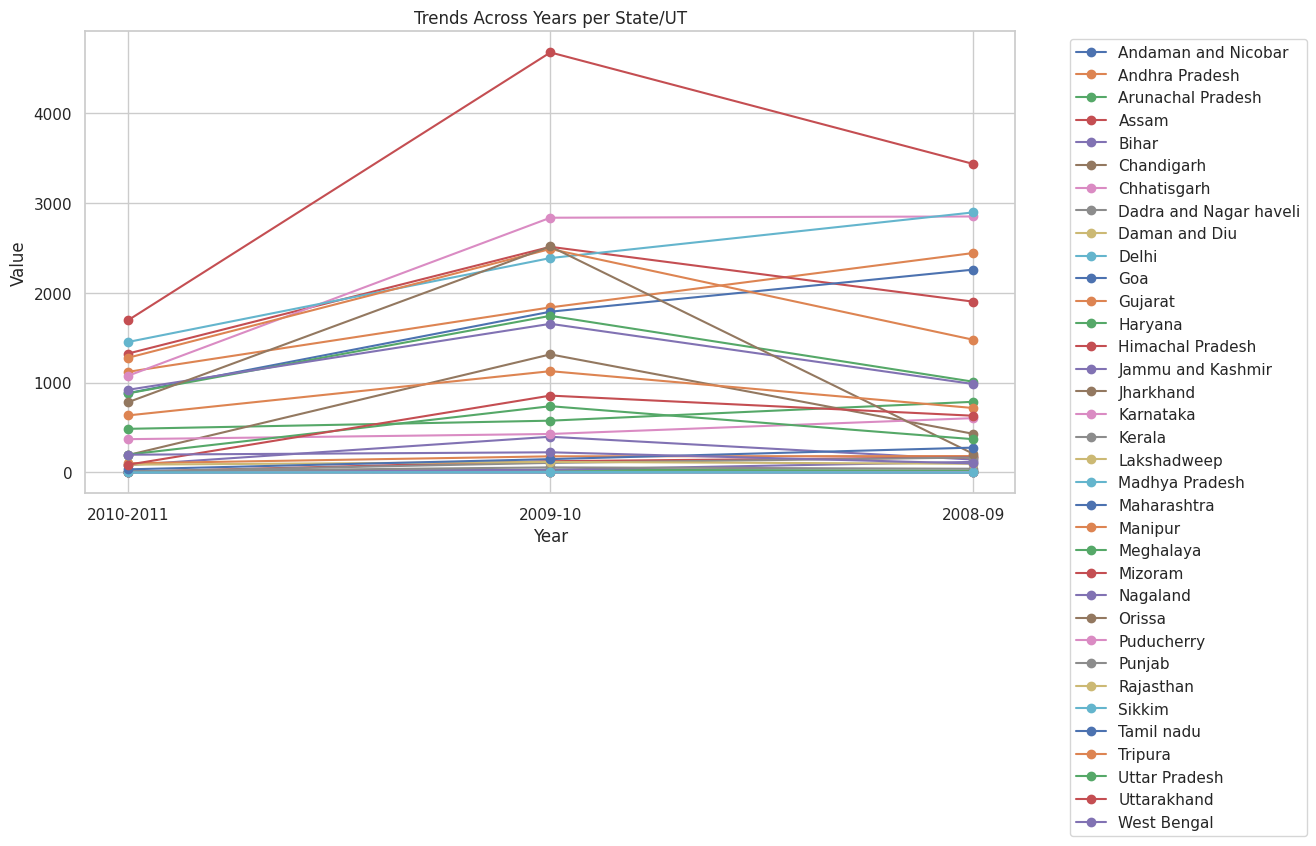

In [ ]:
plt.figure(figsize=(12,6))
for i, row in df.iterrows():
    plt.plot(numeric_cols, row[numeric_cols], marker='o', label=row['States/UTs'])

plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends Across Years per State/UT')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import geopandas as gpd
df.columns = df.columns.str.strip()
df.head()

,States/UTs,2010-2011,2009-10,2008-09
0,Andaman and Nicobar,0,7,1
1,Andhra Pradesh,1119,1837,2442
2,Arunachal Pradesh,485,576,786
3,Assam,1322,2511,1901
4,Bihar,81,397,143


In [ ]:

df['Total_Wildfires'] = df[['2010-2011', '2009-10', '2008-09']].sum(axis=1)
df = df[['States/UTs', 'Total_Wildfires']]


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving india_state.geojson to india_state.geojson


In [ ]:
import geopandas as gpd

india = gpd.read_file("india_state.geojson")
india.head()


,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,105,IND,India,1,Andaman and Nicobar,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,None,None,State,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,None,Agence de la Frontire du Nord-Est(French-obsol...,State,State,"POLYGON ((96.15778 29.3831, 96.1638 29.37668, ..."
3,105,IND,India,4,Assam,None,None,State,State,"MULTIPOLYGON (((89.87145 25.5373, 89.87118 25...."
4,105,IND,India,5,Bihar,None,None,State,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [ ]:
print(df.columns)
print(india.columns)

Index(['States/UTs', 'Total_Wildfires'], dtype='object')
Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'geometry'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print(df.columns.tolist())


['States/UTs', 'Total_Wildfires']


In [ ]:
print(india.columns.tolist())


['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1', 'TYPE_1', 'ENGTYPE_1', 'geometry']


In [ ]:
df.rename(columns={'States/UTs':'NAME_1'}, inplace=True)


In [ ]:
print(df.columns.tolist())


['st_nm', 'Total_Wildfires']


In [ ]:
print(india.columns.tolist())


['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1', 'TYPE_1', 'ENGTYPE_1', 'geometry']


In [ ]:
df.rename(columns={'st_nm':'NAME_1'}, inplace=True)


In [ ]:
merged = india.merge(df, on='NAME_1', how='left')


<Figure size 1200x1200 with 0 Axes>

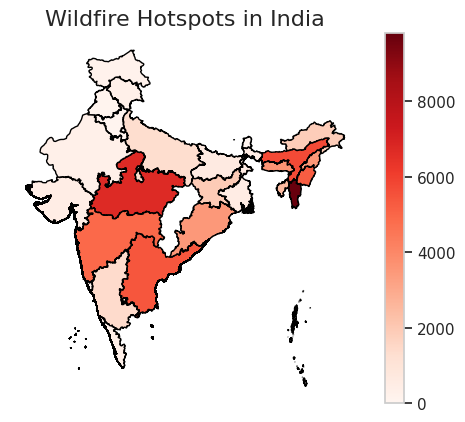

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
merged.plot(column='Total_Wildfires', cmap='Reds', legend=True, edgecolor='black')
plt.title('Wildfire Hotspots in India', fontsize=16)
plt.axis('off')
plt.show()


In [ ]:

top_states = df.sort_values(by='Total_Wildfires', ascending=False).head(5)
print("Top 5 states with highest wildfires:\n", top_states[['NAME_1','Total_Wildfires']])

low_states = df.sort_values(by='Total_Wildfires', ascending=True).head(5)
print("\nStates with unusually low wildfire counts:\n", low_states[['NAME_1','Total_Wildfires']])

missing_states = df[df['Total_Wildfires'].isnull()]
print("\nStates with missing wildfire data:\n", missing_states[['NAME_1']])

total_wildfires = df['Total_Wildfires'].sum()
print(f"\nTotal wildfires across all states: {total_wildfires}")
print("Pattern: Central and eastern states have higher wildfire counts (hotspots).")
print("Anomaly: Some states have unusually low or missing counts, which may need further investigation.")


Top 5 states with highest wildfires:
             NAME_1  Total_Wildfires
23         Mizoram             9800
6      Chhatisgarh             6758
19  Madhya Pradesh             6731
3            Assam             5734
1   Andhra Pradesh             5398

States with unusually low wildfire counts:
                     NAME_1  Total_Wildfires
7   Dadra and Nagar haveli                0
5               Chandigarh                0
8            Daman and Diu                0
18             Lakshadweep                0
26              Puducherry                0

States with missing wildfire data:
 Empty DataFrame
Columns: [NAME_1]
Index: []

Total wildfires across all states: 69098
Pattern: Central and eastern states have higher wildfire counts (hotspots).
Anomaly: Some states have unusually low or missing counts, which may need further investigation.


In [ ]:
print(df.columns)


Index(['States/UTs', '2010-2011', '2009-10', '2008-09'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

df['States/UTs_encoded'] = LabelEncoder().fit_transform(df['States/UTs'])


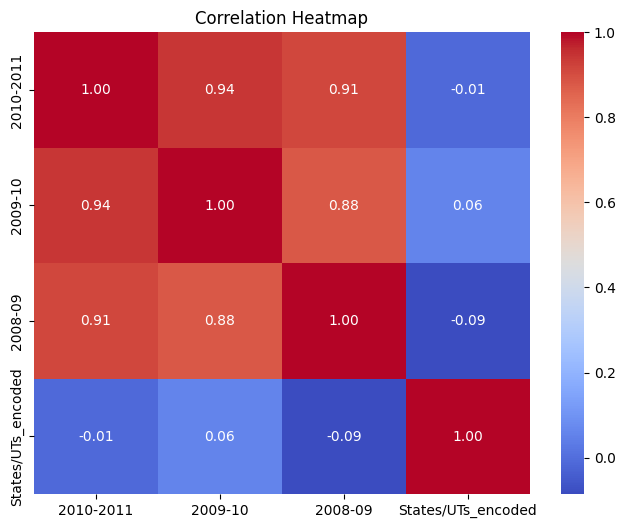

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df['States/UTs_encoded'] = LabelEncoder().fit_transform(df['States/UTs'])

scaler = StandardScaler()
df[['2010-2011','2009-10','2008-09']] = scaler.fit_transform(df[['2010-2011','2009-10','2008-09']])


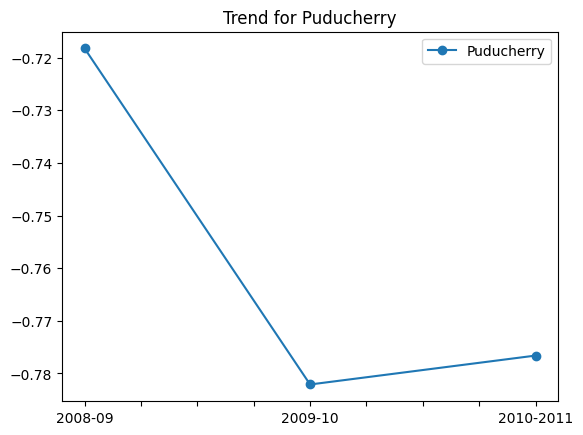

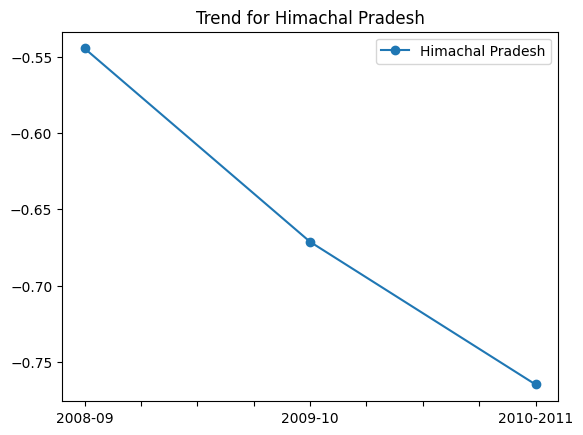

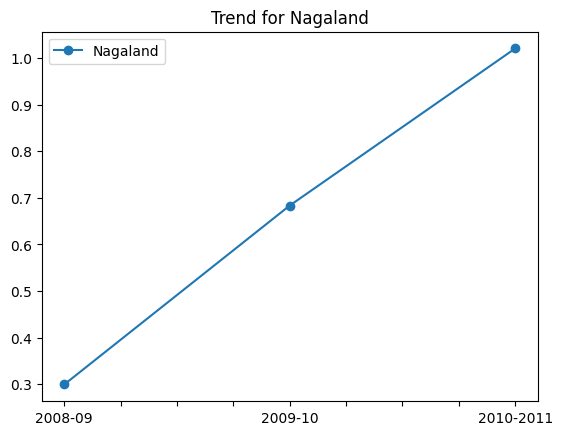

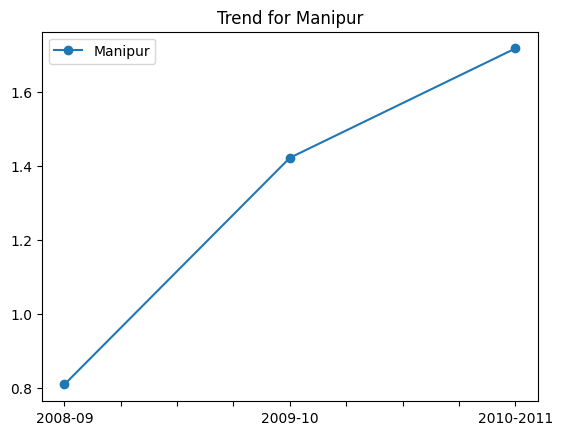

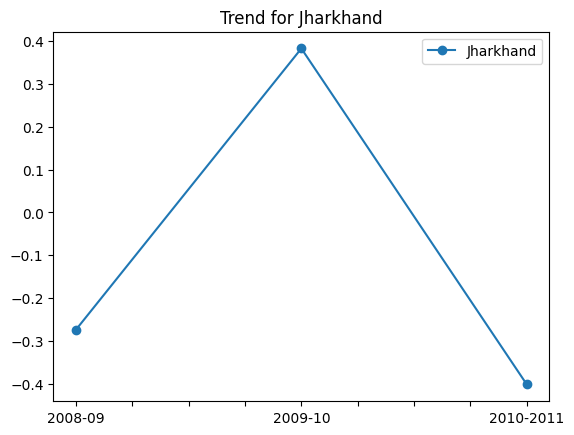

In [ ]:
sample_states = df['States/UTs'].sample(5, random_state=42)

for state in sample_states:
    row = df[df['States/UTs'] == state][['2008-09','2009-10','2010-2011']].T
    row.columns = [state]
    row.plot(kind='line', marker='o', title=f"Trend for {state}")
    plt.show()


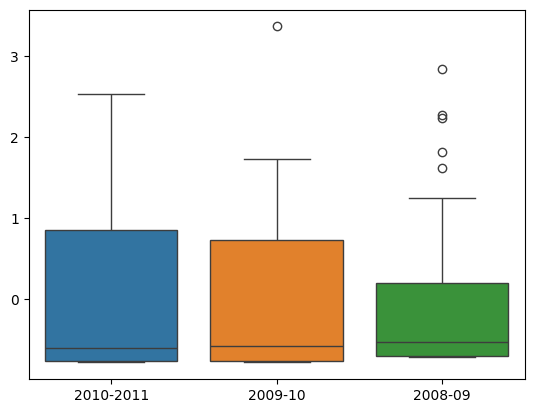

In [ ]:
sns.boxplot(data=df[['2010-2011','2009-10','2008-09']])
plt.show()
